In [1]:
from captcha_creation import Captcha

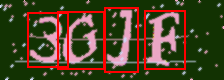

[{'char': '3', 'bb': (27, 12, 68, 67)},
 {'char': 'G', 'bb': (57, 11, 104, 69)},
 {'char': 'J', 'bb': (104, 7, 138, 72)},
 {'char': 'F', 'bb': (144, 10, 185, 69)}]

In [6]:
im, bb = Captcha().generate_image("3GJF")

Captcha().show_image(im, bb)

bb

In [ ]:

import os

In [83]:
import random
import string

def generate_random_string(length = None):
    """Generates a random string of the specified length.

    Args:
    length: The desired length of the string.

    Returns:
    A random string of the specified length.
    """
    
    charset = "abcdefghijklmnpqrstuvwxyz123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    if length is None:
        length = random.randint(3, 6)
    
    return ''.join(random.choice(charset) for i in range(length))

In [ ]:
def create_yolo_dataset(image_generator, output_dir):
  """
  Creates a YOLO dataset from an image generator.

  Args:
    image_generator: A function that returns an image and its bounding boxes.
    output_dir: The directory to save the images and annotations.
    class_names: A list of class names.
  """
  
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  image_index = 0
  for i in range(10):
    image, boxes = image_generator()
    image_path = os.path.join(output_dir, f"{image_index}.jpg")
    label_path = os.path.join(output_dir, f"{image_index}.txt")

    # Save the image
    image.save(image_path)

    # Write the YOLO annotations
    with open(label_path, 'w') as f:
      for box in boxes:
        class_char = box["char"]
        x_min, y_min, x_max, y_max = box["bb"]

        # Convert bounding boxes to YOLO format
        width, height = image.shape[1], image.shape[0]
        x_center = (x_min + x_max) / 2 / width
        y_center = (y_min + y_max) / 2 / height
        box_width = (x_max - x_min) / width
        box_height = (y_max - y_min) / height

        line = f"{class_char} {x_center} {y_center} {box_width} {box_height}\n"
        f.write(line)

    image_index += 1

def image_generator():
    # generate 
    return Captcha().generate_image(generate_random_string())